In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [5]:
df = pd.read_csv(r'C:\Users\RakeshB\Downloads\movies.csv')

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [9]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [10]:
# extract the date from realease column

df['year_release'] = df['released'].astype('str').str.extract('(\d{4})')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,2020


In [12]:
# removing the null value

df['rating'] = df['rating'].replace(np.nan, 'Unknown')
df['released'] = df['released'].replace(np.nan, 'Unknown')
df['score'] = df['score'].replace(np.nan, 0)
df['votes'] = df['votes'].replace(np.nan, 0)
df['writer'] = df['writer'].replace(np.nan, 'Unknown')
df['star'] = df['star'].replace(np.nan, 'Unknown')
df['country'] = df['country'].replace(np.nan, 'Unknown')
df['budget'] = df['budget'].replace(np.nan, 0)
df['gross'] = df['gross'].replace(np.nan, 0)
df['company'] = df['company'].replace(np.nan, 'Unknown')
df['runtime'] = df['runtime'].replace(np.nan, 0)

In [14]:
# Checking if all null values replaced or not

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
year_release - 0.0002608242044861763%


In [15]:
df['year_release'] = df['year_release'].replace(np.nan, 0)

# again checking for any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
year_release - 0.0%


In [16]:
# checking data type for the columns

print(df.dtypes)

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget          float64
gross           float64
company          object
runtime         float64
year_release     object
dtype: object


In [17]:
# sort data by gross

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0.0,0.000000e+00,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0.0,0.000000e+00,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0.0,0.000000e+00,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,Unknown,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0.0,0.000000e+00,Budapest Stúdió Vállalat,104.0,1990


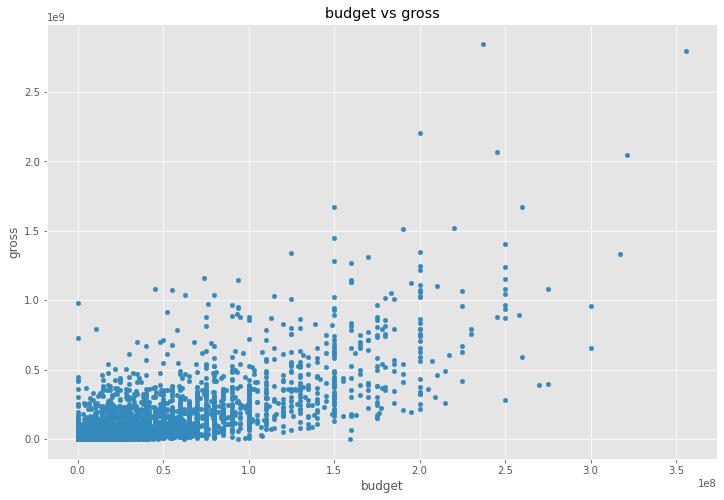

In [18]:
# Create a scatter chart budget vs gross

df.plot.scatter(x='budget', y='gross')

# Adding Label

plt.title('budget vs gross')
plt.xlabel('budget')
plt.ylabel('gross')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

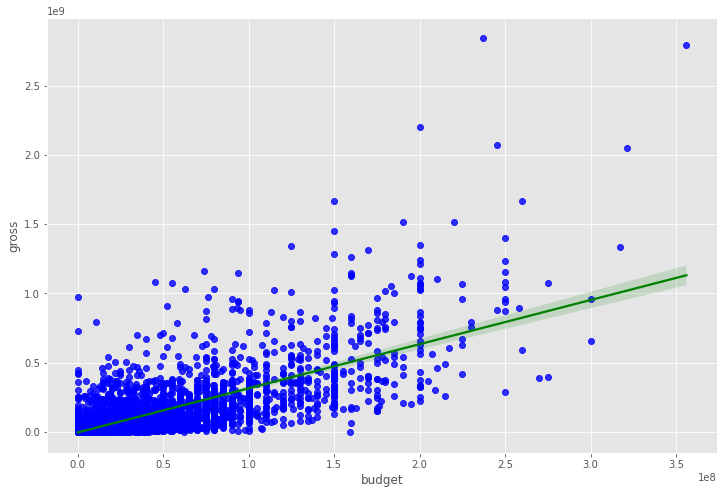

In [21]:
# using Seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color":"blue"}, line_kws={"color":"Green"})
plt.show

In [22]:
# use correlation demo

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


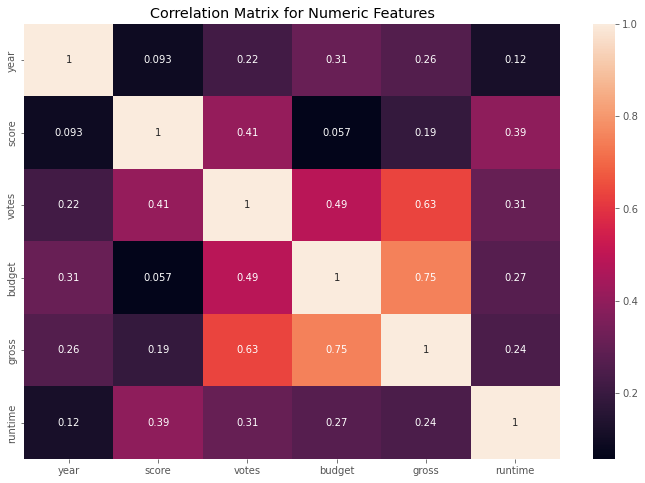

In [23]:
#let see heatmap with the help of correlation

sns.heatmap(df.corr(method='pearson'), annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [25]:
# Start with our data

df_sample = df.copy()


for col_name in df_sample.columns:
    if (df_sample[col_name].dtype == 'object'):
        df_sample[col_name] = df_sample[col_name].astype('category')
        df_sample[col_name] = df_sample[col_name].cat.codes

df_sample


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2320,146.0,1
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,10,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,0.0,2283,90.0,41
7664,1678,10,4,2020,1107,4.7,36.0,774,2614,1886,55,0.0,0.0,539,90.0,41
7665,4717,10,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,0.0,941,0.0,41
7666,2843,10,6,2020,2817,0.0,0.0,1184,1824,450,55,15000.0,0.0,2283,120.0,41


In [27]:

df_sample.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_release
name,1.000000,-0.012206,0.016355,0.011453,-0.010480,0.016377,0.013038,0.009079,0.009985,0.006844,-0.010359,0.020548,0.006989,0.010373,0.008483,0.010225
rating,-0.012206,1.000000,0.136127,0.033801,0.025526,0.013917,-0.004429,0.011951,-0.001610,0.001063,-0.011793,-0.141632,-0.131883,-0.092284,0.054119,0.035348
genre,0.016355,0.136127,1.000000,-0.081261,0.030429,0.027384,-0.145296,-0.015258,0.006747,-0.004641,-0.035783,-0.334021,-0.234297,-0.070032,-0.052914,-0.078210
year,0.011453,0.033801,-0.081261,1.000000,0.000077,0.092616,0.222427,-0.020795,-0.007930,-0.027912,-0.069590,0.309212,0.261900,-0.011425,0.116358,0.996397
released,-0.010480,0.025526,0.030429,0.000077,1.000000,0.039182,0.015935,-0.001526,-0.003707,0.015474,-0.021707,0.008552,0.000100,-0.007634,-0.000281,-0.005512
score,0.016377,0.013917,0.027384,0.092616,0.039182,1.000000,0.407101,0.010568,0.022475,0.000823,-0.134439,0.056863,0.186012,-0.005964,0.394564,0.100897
votes,0.013038,-0.004429,-0.145296,0.222427,0.015935,0.407101,1.000000,0.000349,0.000487,-0.019380,0.073424,0.486931,0.632870,0.130535,0.306984,0.217782
director,0.009079,0.011951,-0.015258,-0.020795,-0.001526,0.010568,0.000349,1.000000,0.299523,0.039875,0.018014,0.004976,-0.014916,0.004248,0.017062,-0.020385
writer,0.009985,-0.001610,0.006747,-0.007930,-0.003707,0.022475,0.000487,0.299523,1.000000,0.028887,0.014490,-0.026777,-0.022963,0.001729,-0.004213,-0.007653
star,0.006844,0.001063,-0.004641,-0.027912,0.015474,0.000823,-0.019380,0.039875,0.028887,1.000000,-0.015101,-0.020228,-0.001326,0.007918,0.008216,-0.028284


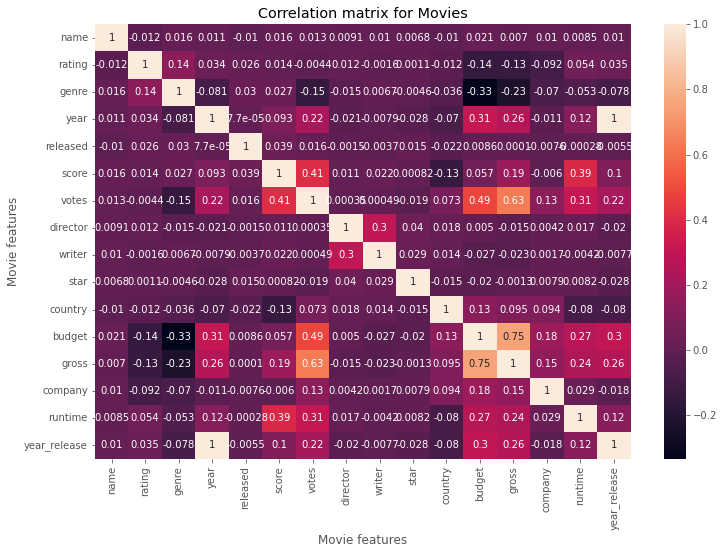

In [28]:
# creating correlation heatmap

correlation_matrix = df_sample.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

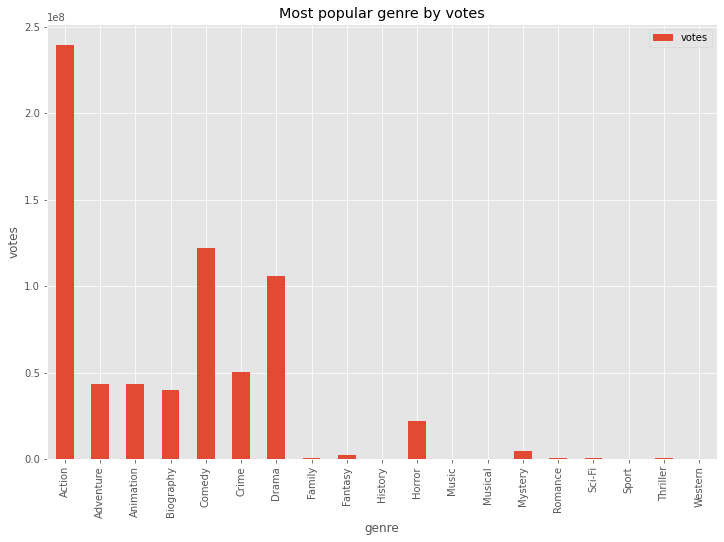

In [33]:
# Find more popular genre by votes

ax = df[['genre','votes']].groupby(['genre']).sum().sort_values(by = ['genre'], ascending = True)\
.plot(kind = 'bar')

ax.set_xlabel('genre')
ax.set_ylabel('votes')
ax.set_title('Most popular genre by votes')

plt.show()

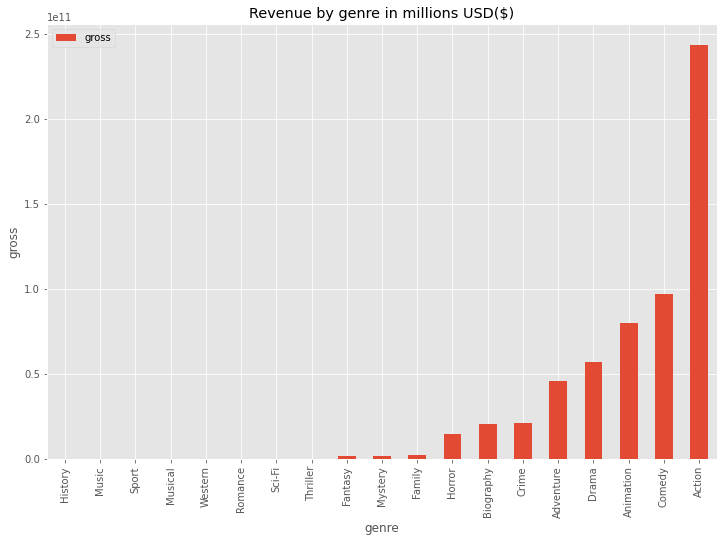

In [34]:
# check with the gross also

ax = df[['genre','gross']].groupby(['genre']).sum().sort_values(by = ['gross'], ascending = True)\
.plot(kind = 'bar')

ax.set_xlabel('genre')
ax.set_ylabel('gross')
ax.set_title('Revenue by genre in millions USD($)')

plt.show()

In [45]:
pip install prettytable

In [56]:
# check about IMDB Score wise genre
from prettytable import PrettyTable

df_table = df[['genre','score']].groupby(['genre']).mean().sort_values(by = ['score'], ascending = False)

table = PrettyTable()
table.field_names = ["genre", "Average Score"]

# Adding values into new table
for index, row in df_table.iterrows():
    table.add_row([index, round(row['score'], 2)])

table.align["Genre"] = "l"  # left align the genre column
table.align["Average Score"] = "r"  # right align the score column
table.padding_width = 1  # add some padding to the cells

print(table)


+-----------+---------------+
|   genre   | Average Score |
+-----------+---------------+
|  History  |           8.3 |
|  Musical  |          8.05 |
|   Music   |           7.2 |
| Biography |          7.03 |
| Animation |          6.77 |
|   Drama   |          6.68 |
|   Crime   |          6.67 |
|  Mystery  |          6.67 |
|  Romance  |          6.41 |
|   Family  |          6.36 |
| Adventure |          6.29 |
|   Sci-Fi  |          6.21 |
|   Action  |           6.2 |
|   Comedy  |          6.19 |
|  Fantasy  |          6.01 |
|  Thriller |          5.91 |
|   Sport   |           5.9 |
|   Horror  |          5.75 |
|  Western  |          5.67 |
+-----------+---------------+


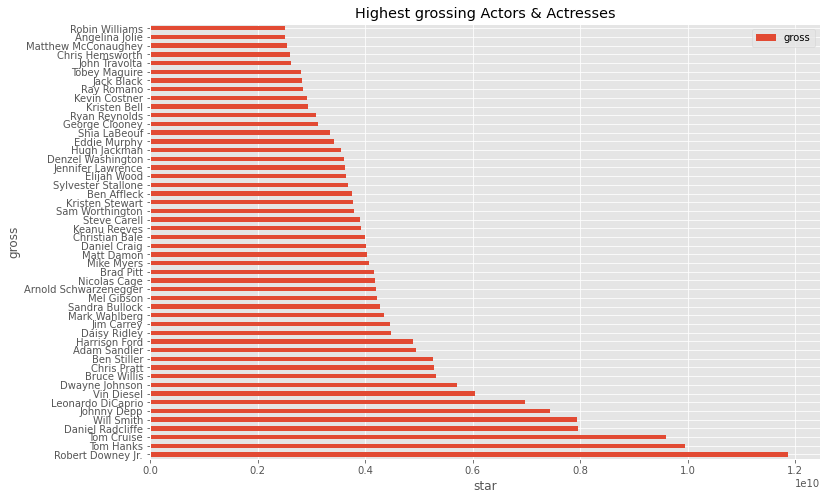

In [52]:
# Highest grossing Actors & Actresses

ax = df[['star','gross']].groupby(['star']).sum().sort_values(by = ['gross'], ascending = False).head(50)\
.plot(kind = 'barh')

ax.set_xlabel('star')
ax.set_ylabel('gross')
ax.set_title('Highest grossing Actors & Actresses')

plt.show()

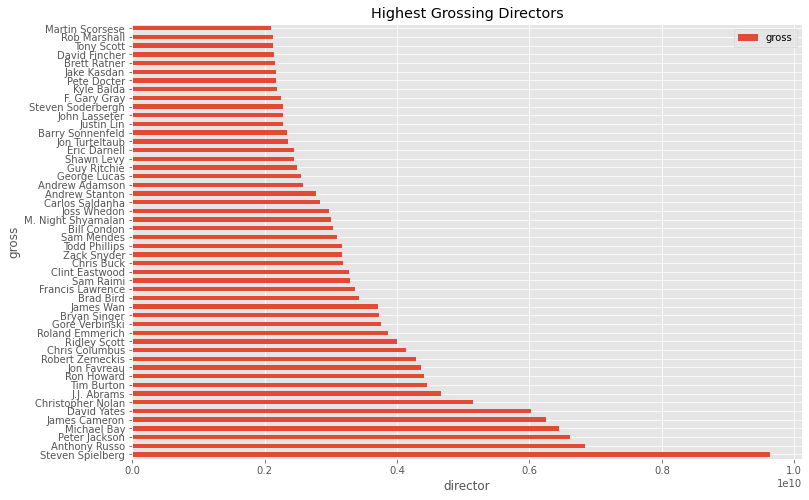

In [54]:
# Highest Grossing Directors

ax = df[['director','gross']].groupby(['director']).sum().sort_values(by = ['gross'], ascending = False).head(50)\
.plot(kind = 'barh')

ax.set_xlabel('director')
ax.set_ylabel('gross')
ax.set_title('Highest Grossing Directors')

plt.show()